<a href="https://colab.research.google.com/github/Kshitez-Pratap-Singh/BTC-Coin-Price-Prediction-LSTM/blob/main/Copy_of_BTC_LSTM_Stock_Market_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Long Short Term Memory (LSTM) Model in Bitcoin Price Prediction**
In this article, we'll delve into Bitcoin price prediction utilizing the Long Short-Term Memory (LSTM) model, a sophisticated neural network architecture renowned for its effectiveness in analyzing and forecasting cryptocurrency prices.

Bitcoin, the pioneer and most widely recognized cryptocurrency, has exhibited remarkable price volatility over the years. The dynamic nature of its value presents both lucrative opportunities and substantial risks for investors. Anticipating the direction of Bitcoin's price movement is a quest that captivates the interest of many.

Our adoption of the LSTM model introduces a robust methodology for predicting Bitcoin prices, characterized by its ability to capture intricate patterns and dependencies within the time series data. No longer reliant on intuition or instinct, our approach leverages the power of deep learning to discern meaningful insights from historical Bitcoin pricing data.

The LSTM model undergoes a meticulous process involving the analysis of extensive historical Bitcoin data. We meticulously select optimal model parameters, train the LSTM model to comprehend complex patterns, and subsequently utilize it to generate precise short and long-term Bitcoin price forecasts. By doing so, we aim to provide a data-driven narrative that sheds light on the fundamental factors steering Bitcoin's price trends.

In essence, the LSTM model empowers us to move beyond traditional statistical models and explore the nuanced dynamics inherent in Bitcoin's pricing behavior. By embracing this cutting-edge technology, we strive to equip investors and enthusiasts with a comprehensive tool that enhances their understanding of Bitcoin's market movements, ultimately facilitating more informed decision-making in the ever-evolving landscape of cryptocurrency.

## **Overview of LSTM Model**
- Developed in 1997 as an improvement over traditional recurrent neural networks (RNNs).
- Addresses issues like the vanishing gradient problem in RNNs.
- Allows for the storage and retrieval of information over extended sequences.
- Three gates (input, forget, output) regulate the flow of information within memory cells.
- Excels at learning and preserving long-range dependencies in sequential data.
- Mitigates gradient vanishing and exploding problems during deep network training.
- Enables stable gradient flow through the network during backpropagation.
- Adaptable for various applications, including natural language processing and time-series prediction.
- Versatile due to its ability to learn complex patterns and dependencies.
- **Applications:**
  - Used for **predicting sequential data** like stock prices and weather patterns.
  - Crucial for **language translation**, **sentiment analysis**, and **text generation**.
  - Contributes to **accurate speech recognition** systems by understanding spoken language.
  - Applied in **computer vision** for recognizing temporal patterns in gestures.
  - Utilized in **patient monitoring**, **disease progression prediction**, and **medical time-series analysis**.
- Requires careful hyperparameter tuning and consideration of data characteristics.
- Ongoing advancements, such as Transformer architectures, provide alternatives in certain applications.
- Despite challenges, LSTMs remain a powerful tool for sequential data tasks in deep learning.

## **A Report on Bit Coin Price Prediction Using LSTM Model**

### **Importing the Necessary Libraries for the Analysis**
Brief description of each library and why it is used in this project:

1. **Pandas (pd):**Pandas is a powerful data manipulation and analysis library. It provides data structures like DataFrames that make it easy to handle and manipulate structured data.

2. **Seaborn (sns):**Seaborn is a statistical data visualization library based on Matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

3. **NumPy (np):**NumPy is a fundamental package for scientific computing with Python. It provides support for large, multi-dimensional arrays and matrices, along with mathematical functions to operate on these arrays.

4. **yfinance:**yfinance is a Python library that provides an easy way to download historical market data from Yahoo Finance.

5. **Matplotlib.pyplot (plt):**Matplotlib is a comprehensive 2D plotting library. The pyplot module provides a MATLAB-like interface for creating static, interactive, and animated plots.

6. **MinMaxScaler (from sklearn.preprocessing):**MinMaxScaler is a preprocessing technique in scikit-learn that scales and transforms data to a specific range, typically between 0 and 1.

7. **TimeSeriesSplit (from sklearn.model_selection):**TimeSeriesSplit is a cross-validator for time series data. It provides train/test indices to split time series data into train/test sets while preserving temporal order.

8. **TensorFlow and Keras:**TensorFlow is an open-source machine learning framework, and Keras is a high-level neural networks API that runs on top of TensorFlow.

9. **LSTM, Dense, Dropout (from tensorflow.keras.layers):**These are specific layers used in building neural network architectures with Keras.LSTM (Long Short-Term Memory) layers are particularly effective for modeling sequential data, such as time series.

10. **Sequential, plot_model (from tensorflow.keras.models and tensorflow.keras.utils):**Sequential is a linear stack of layers for building neural network models. plot_model is a utility function for creating visual representations of the model.

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from tensorflow import keras
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model

### **Loading the Dataset**
The "yfinance" or "yf" library is a Python package that allows users to download historical market data, including stock prices, dividends, and split data from Yahoo Finance. It provides a convenient way to access financial data for a wide range of assets, such as stocks, exchange-traded funds (ETFs), indices, and more.

Here's a brief description of what you can do with the data obtained using the "yf" library:

- **Stock Prices**: Retrieve historical and real-time stock prices for specific tickers. <br>
- **Dividends and Splits**: Access information about dividend payments and stock splits for a given security.<br>
- **Historical Data**: Obtain historical price data for various time intervals (daily, weekly, monthly).<br>
- **Financial Statistics**: Retrieve key financial metrics, such as market capitalization, volume, and more.

The ability to access such data is valuable for financial analysis, quantitative modeling, and the development of trading strategies. Researchers, analysts, and developers often use "yf" to collect financial data for further analysis and visualization in Python environments. Keep in mind that the availability of certain data may depend on the asset and the data source's coverage.

In [ ]:
df = yf.download('BTC-USD', start='2015-01-01', end='2024-01-01',interval="1d")

[*********************100%%**********************]  1 of 1 completed


### **Exploring the Dataset**

The dataset has important information like Date, Open, High, Low, Close, Adj Close, and Volume. We're focusing on a specific time period of five years. This duration is chosen for the LSTM Model to analyze and make predictions. These details are crucial for the model to understand and find patterns in the data during this five-year span, making its analysis more effective.

In [ ]:
df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550
2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400
2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100
2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800
2015-01-06,274.610992,287.553009,272.696014,286.188995,286.188995,23245700
2015-01-07,286.076996,298.753998,283.079010,294.337006,294.337006,24866800
2015-01-08,294.135010,294.135010,282.174988,283.348999,283.348999,19982500
2015-01-09,282.382996,291.114014,280.532990,290.407990,290.407990,18718600


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3.287000e+03
mean,15030.227822,15381.631744,14651.962175,15041.625620,15041.625620,1.708190e+10
std,16240.295312,16630.177156,15803.040490,16242.203249,16242.203249,1.915408e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,7.860650e+06
25%,1185.275024,1206.515015,1172.234985,1187.840027,1187.840027,3.349970e+08
50%,8658.991211,8826.943359,8389.889648,8659.487305,8659.487305,1.278036e+10
75%,25141.166016,25937.496094,24849.660156,25369.524414,25369.524414,2.741688e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


### **Data Preprocessing**

#### **1. Removing the Unwanted Column**
By eliminating columns that weren't essential, we aimed to simplify the dataset. This process helps the model work more accurately. We decided to remove the 'Close' column while keeping the 'Adj Close' column for our analysis. This choice was made to improve the overall effectiveness of our modeling approach.

In [ ]:
df.drop('Close', axis=1,inplace=True)

In [ ]:
df.shape

(3287, 5)

#### **2. Checking for the Unwanted Column**

The dataset exhibits a notable absence of missing values, indicating a balanced and complete dataset. Consequently, there is no necessity for imputation procedures, affirming the dataset's integrity and suitability for subsequent analyses.

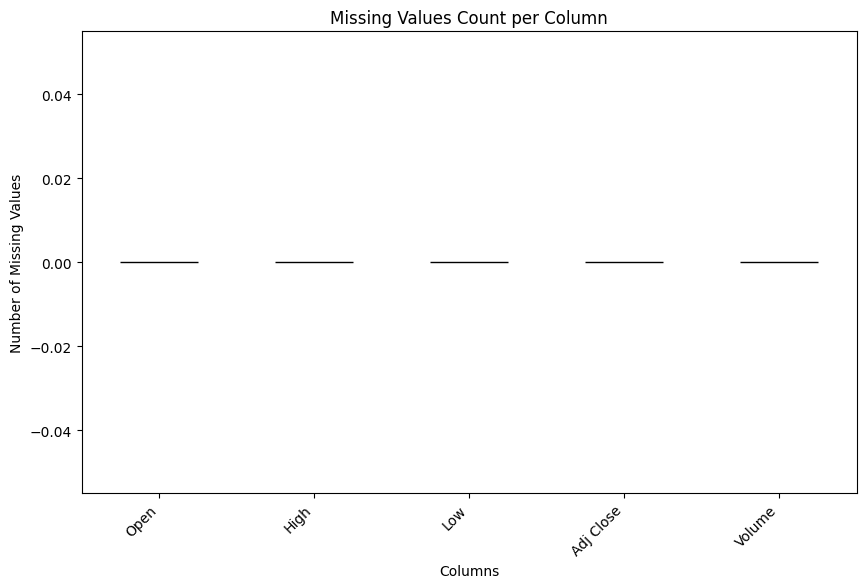

In [ ]:
missing_values = df.isnull().sum()

plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Missing Values Count per Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.show()

#### **3. Plotting the graph of change of price over time (2015-2024)**

The chart gives a picture of how prices went up and down from January 2015 to January 2024, covering nine years. Those rises and falls in the graph tell us that there are repeating patterns and general trends in the data, indicating seasonality and trend in the BitCoin Dataset

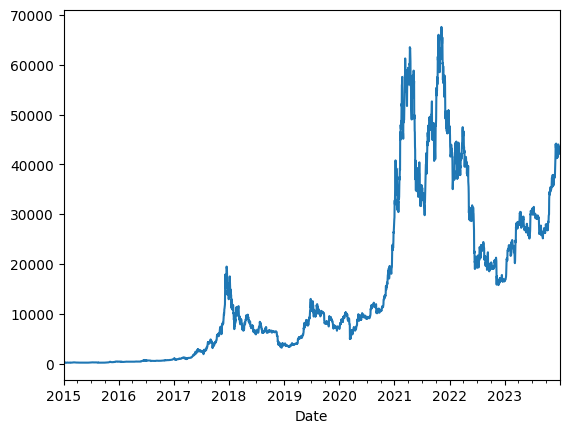

In [ ]:
import matplotlib.pyplot as plt
df['Adj Close'].plot()
plt.show()

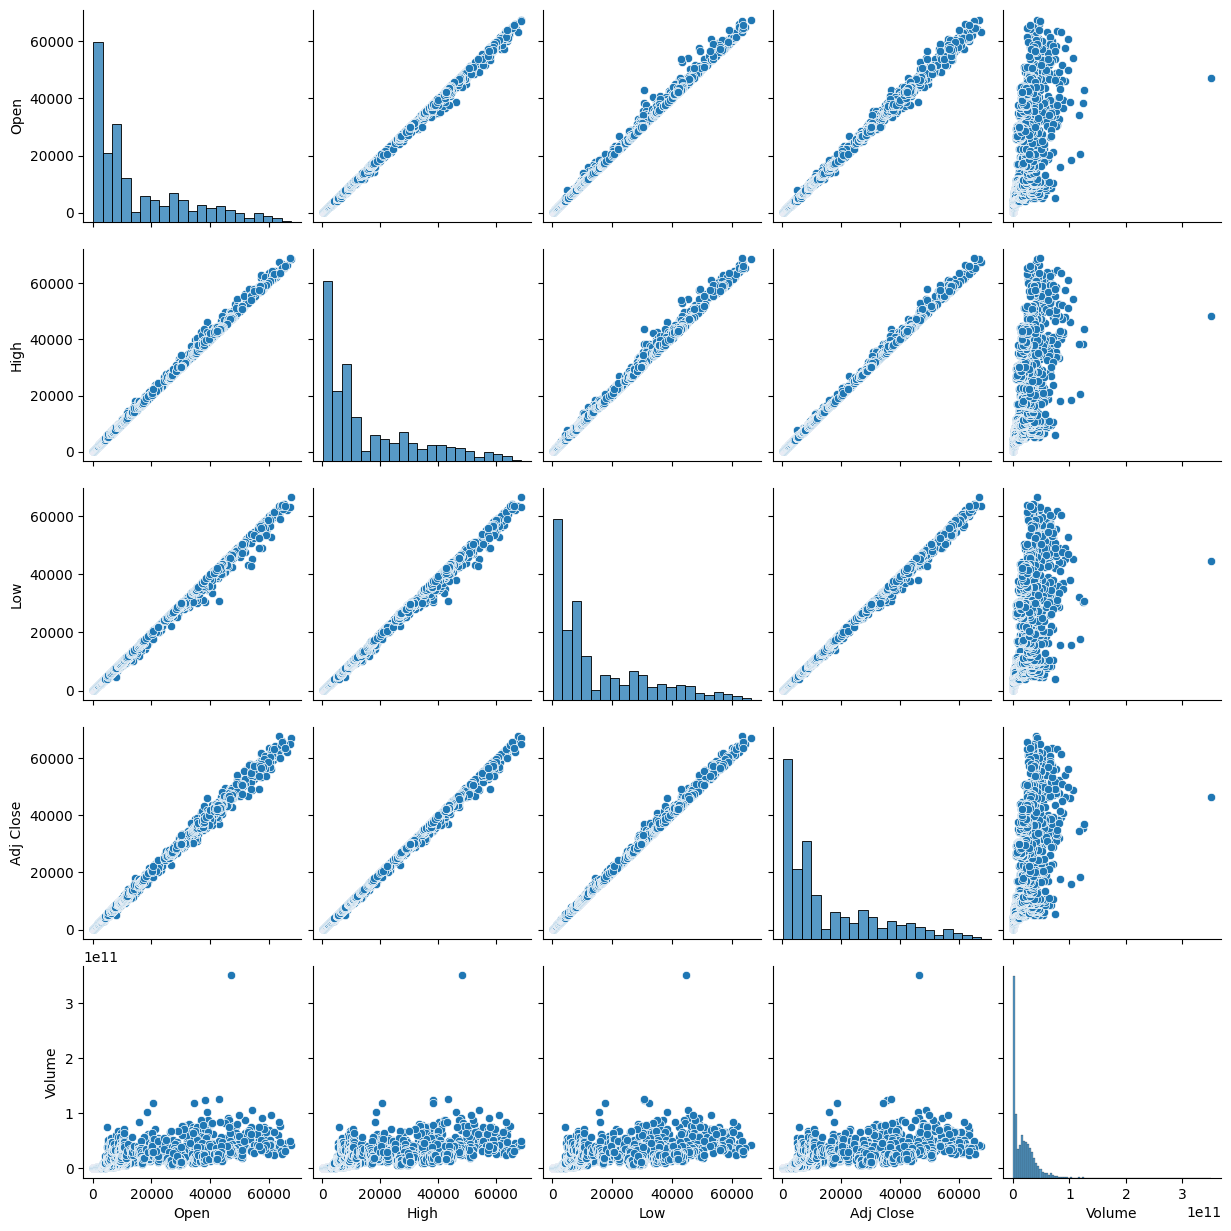

In [ ]:
sns.pairplot(df)

In [ ]:
corr_matrix = df.corr()['Adj Close']

In [ ]:
corr_matrix

Open         0.998800
High         0.999459
Low          0.999357
Adj Close    1.000000
Volume       0.669752
Name: Adj Close, dtype: float64

<Axes: >

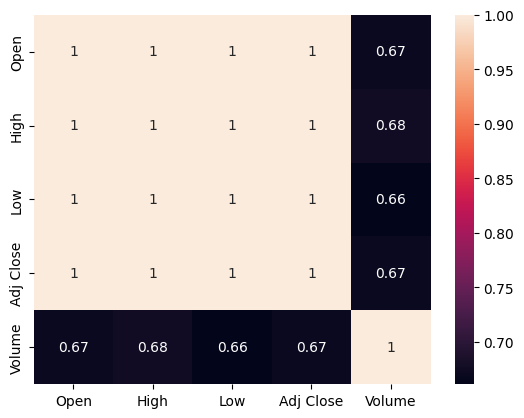

In [ ]:
sns.heatmap(df.corr(), annot=True)

### **Standardising and Normalising the Dataset**
It involves transforming the data to make it more suitable for modeling. These techniques can help to improve model performance, reduce the impact of outliers, and ensure that the data is on the same scale.

In [ ]:
features=['Open','High','Low','Volume']

In [ ]:
output_var=pd.DataFrame(df['Adj Close'])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Open,High,Low,Volume
Date,,,,
2015-01-01,0.002131,0.001585,0.002152,5.011966e-07
2015-01-02,0.002036,0.001518,0.002146,0.000000e+00
2015-01-03,0.002048,0.001508,0.001655,7.178523e-05
2015-01-04,0.001547,0.001101,0.001300,1.361079e-04
2015-01-05,0.001309,0.000971,0.001413,1.028668e-04


### **Splitting the Dataset**
The Dataset was splitted in training and testing set, where 10% data was given to the testing set and 90% data was given to the training set. This split was in 90-10 ratio, in order to avoid overfitting in the dataset

In [ ]:
#Splitting to Training set and Test set
from sklearn.model_selection import TimeSeriesSplit
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [ ]:
X_train

,Open,High,Low,Volume
Date,,,,
2015-01-01,0.002131,0.001585,0.002152,5.011966e-07
2015-01-02,0.002036,0.001518,0.002146,0.000000e+00
2015-01-03,0.002048,0.001508,0.001655,7.178523e-05
2015-01-04,0.001547,0.001101,0.001300,1.361079e-04
2015-01-05,0.001309,0.000971,0.001413,1.028668e-04
...,...,...,...,...
2023-03-04,0.329302,0.323624,0.332688,3.179322e-02
2023-03-05,0.329172,0.326664,0.334322,3.792209e-02
2023-03-06,0.330399,0.326236,0.334687,4.942252e-02


In [ ]:
X_test

,Open,High,Low,Volume
Date,,,,
2023-03-09,0.319761,0.314839,0.302653,0.086496
2023-03-10,0.299677,0.293956,0.293862,0.112749
2023-03-11,0.297019,0.300108,0.300513,0.085971
2023-03-12,0.303552,0.320414,0.306255,0.083403
2023-03-13,0.326237,0.354912,0.328447,0.140923
...,...,...,...,...
2023-12-27,0.628467,0.633899,0.634281,0.071954
2023-12-28,0.642563,0.635672,0.636561,0.065490
2023-12-29,0.629894,0.625750,0.623051,0.074060


In [ ]:
y_train

array([  314.24899292,   315.03201294,   281.08200073, ...,
       22429.7578125 , 22219.76953125, 21718.08007812])

In [ ]:
y_test

array([20363.02148438, 20187.24414062, 20632.41015625, 22163.94921875,
       24197.53320312, 24746.07421875, 24375.9609375 , 25052.7890625 ,
       27423.9296875 , 26965.87890625, 28038.67578125, 27767.23632812,
       28175.81640625, 27307.4375    , 28333.97265625, 27493.28515625,
       27494.70703125, 27994.33007812, 27139.88867188, 27268.13085938,
       28348.44140625, 28033.5625    , 28478.484375  , 28411.03515625,
       28199.30859375, 27790.22070312, 28168.08984375, 28177.984375  ,
       28044.140625  , 27925.859375  , 27947.79492188, 28333.05078125,
       29652.98046875, 30235.05859375, 30139.05273438, 30399.06640625,
       30485.69921875, 30318.49609375, 30315.35546875, 29445.04492188,
       30397.55273438, 28822.6796875 , 28245.98828125, 27276.91015625,
       27817.5       , 27591.38476562, 27525.33984375, 28307.59765625,
       28422.70117188, 29473.78710938, 29340.26171875, 29248.48828125,
       29268.80664062, 28091.56835938, 28680.53710938, 29006.30859375,
      

### **LSTM Model Implementation**
We wanted to figure out where Bitcoin prices might go, so we used a smart tool called the Long Short-Term Memory (LSTM) model. We taught it by showing nine years' worth of historical Bitcoin prices, hoping it would get really good at predicting the ups and downs.

To make sure our tool learns well, we made it go through 5000 rounds of learning, each time looking at eight pieces of data at a time. This way, it could catch the tricky parts in the Bitcoin price patterns. The graph we got at the end shows how well our tool can predict Bitcoin prices, and it matches up pretty well with the actual prices we've seen.

The trick our tool uses is looking at how prices changed in the past to guess what might happen next. This helps us understand and predict where Bitcoin prices might go in the future. Our tool is like a detective looking at the history of Bitcoin prices to make a good guess about what comes next.

So, in a nutshell, our tool, the LSTM model, learned a lot from nine years of Bitcoin price history. The graph it made shows that it's doing a pretty good job at telling us where Bitcoin prices might go. It's a step forward in understanding how Bitcoin behaves in the ever-changing world of cryptocurrency.

In [ ]:
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [ ]:
trainX

array([[2.13050244e-03, 1.58511713e-03, 2.15211912e-03, 5.01196602e-07],
       [2.03616193e-03, 1.51809833e-03, 2.14550404e-03, 0.00000000e+00],
       [2.04754632e-03, 1.50805143e-03, 1.65490246e-03, 7.17852296e-05],
       ...,
       [3.30399019e-01, 3.26235769e-01, 3.34686898e-01, 4.94225218e-02],
       [3.30272943e-01, 3.25406420e-01, 3.29853035e-01, 6.48438179e-02],
       [3.27128042e-01, 3.21636670e-01, 3.25273540e-01, 6.41916738e-02]])

In [ ]:
testX

array([[0.31976066, 0.31483886, 0.30265261, 0.08649646],
       [0.29967723, 0.29395573, 0.29386168, 0.112749  ],
       [0.29701851, 0.30010829, 0.30051328, 0.08597111],
       ...,
       [0.62989402, 0.62574965, 0.62305102, 0.07406016],
       [0.62213287, 0.61787249, 0.62504714, 0.04560651],
       [0.62302854, 0.62190896, 0.63172323, 0.04669944]])

In [ ]:
X_train

array([[[2.13050244e-03, 1.58511713e-03, 2.15211912e-03, 5.01196602e-07]],

       [[2.03616193e-03, 1.51809833e-03, 2.14550404e-03, 0.00000000e+00]],

       [[2.04754632e-03, 1.50805143e-03, 1.65490246e-03, 7.17852296e-05]],

       ...,

       [[3.30399019e-01, 3.26235769e-01, 3.34686898e-01, 4.94225218e-02]],

       [[3.30272943e-01, 3.25406420e-01, 3.29853035e-01, 6.48438179e-02]],

       [[3.27128042e-01, 3.21636670e-01, 3.25273540e-01, 6.41916738e-02]]])

In [ ]:
X_test

array([[[0.31976066, 0.31483886, 0.30265261, 0.08649646]],

       [[0.29967723, 0.29395573, 0.29386168, 0.112749  ]],

       [[0.29701851, 0.30010829, 0.30051328, 0.08597111]],

       ...,

       [[0.62989402, 0.62574965, 0.62305102, 0.07406016]],

       [[0.62213287, 0.61787249, 0.62504714, 0.04560651]],

       [[0.62302854, 0.62190896, 0.63172323, 0.04669944]]])

In [ ]:
!pip install tensorflow

In [ ]:
from tensorflow import keras

In [ ]:
!pip install Keras

In [ ]:
#Building the LSTM Model
from tensorflow.keras.layers import LSTM, Dense, Dropout

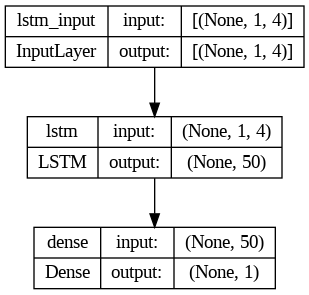

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model

lstm = Sequential()
lstm.add(LSTM(50, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

In [ ]:
#Model Training
history=lstm.fit(X_train, y_train, epochs=3000, batch_size=8, verbose=1, shuffle=False)

Streaming output truncated to the last 5000 lines.
374/374 [==============================] - 1s 2ms/step - loss: 267440.1250
Epoch 502/3000
374/374 [==============================] - 1s 2ms/step - loss: 267356.5938
Epoch 503/3000
374/374 [==============================] - 1s 3ms/step - loss: 267273.3438
Epoch 504/3000
374/374 [==============================] - 1s 3ms/step - loss: 267190.4688
Epoch 505/3000
374/374 [==============================] - 1s 3ms/step - loss: 267107.7500
Epoch 506/3000
374/374 [==============================] - 1s 3ms/step - loss: 267025.1875
Epoch 507/3000
374/374 [==============================] - 1s 3ms/step - loss: 266942.7500
Epoch 508/3000
374/374 [==============================] - 1s 2ms/step - loss: 266860.7812
Epoch 509/3000
374/374 [==============================] - 1s 3ms/step - loss: 266778.8750
Epoch 510/3000
374/374 [==============================] - 1s 2ms/step - loss: 266697.5000
Epoch 511/3000
374/374 [==============================] - 1s 2ms

In [ ]:
#LSTM Prediction
y_pred= lstm.predict(X_test)

10/10 [==============================] - 0s 2ms/step


In [ ]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(y_test,y_pred))
print("The root mean sqaured error is {}.".format(rmse))

The root mean sqaured error is 329.5905533457554.
